In [1]:
from keras import metrics
from keras.models import model_from_json
from PIL import Image
import numpy as np
import requests

Using TensorFlow backend.


In [2]:
model = model_from_json(open('model.json', 'r').read())
model.load_weights('model_weights.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
img = Image.open('data/test/pikachu.jpg')
img = img.resize((224,224), Image.ANTIALIAS)
arr = np.array(img)
arr = arr.reshape((1,) + arr.shape)

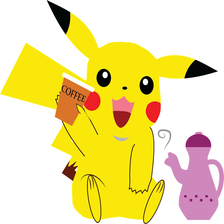

In [4]:
img

In [5]:
pokemon_number = np.argmax(model.predict(arr)) + 1

In [6]:
r = requests.get('http://pokeapi.co/api/v2/pokemon-species/'+str(pokemon_number))

In [7]:
r.json()['name']

'pikachu'